In [1]:
from custom_module import *

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn import set_config
set_config(display='diagram')

In [2]:
main_data = load_data("./data/adult.data")
test_data = load_data("./data/adult.test", skiprows=1)

In [3]:
categorical_preprocessor = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("cardinality", ReduceCardinality()),
  ("encoder", OrdinalEncoder()),
  ("scaler", StandardScaler())
])

In [4]:
numerical_preprocessor = Pipeline(steps=[
  ("scaler", StandardScaler())
])

In [5]:
preprocessor = ColumnTransformer(
  transformers=[
    ("numerical_preprocessor", numerical_preprocessor, numerical_columns),
    ("categorical_preprocessor", categorical_preprocessor, categorical_columns),
  ]
)

In [6]:
model = XGBClassifier(
  colsample_bytree=0.5, 
  learning_rate=0.1,
  max_depth=12,
  min_child_weight=1,
  n_estimators=75,
  subsample=1,
  random_state=42
)

In [7]:
model_pipeline = imbPipeline(steps=[
  ("preprocessor", preprocessor),
  ("smote", SMOTE(random_state=42)),
  ("model", model)
])

In [8]:
display(model_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cardinality',
                                                                   ReduceCardinality()),
                                                                  (...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=75,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, reg_alpha=None,
                               reg_lambda=None, ...))])

In [9]:
X_train = feature_df(main_data)
y_train = target_array(main_data)

X_test = feature_df(test_data)
y_test = target_array(test_data, set="test")

In [10]:
model_pipeline.fit(X_train, y_train);
y_pred = model_pipeline.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.91      0.91      0.91     12435
        >50K       0.70      0.73      0.71      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.82      0.81     16281
weighted avg       0.86      0.86      0.86     16281



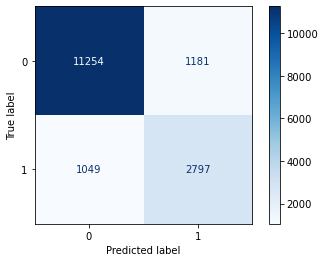

In [12]:
plot_confusion_matrix(model_pipeline, X_test, y_test, cmap='Blues')